# Titanic Data Visualization and Bias Evaluation Lab

This lab is designed to help you explore data visualization using Python libraries and Amazon QuickSight.
The lab focuses on the Titanic dataset and evaluates potential biases in survival rates based on gender (`gender`) and passenger class (`pclass`).

## Objectives
- Perform basic data visualization using Python.
- Create an interactive dashboard in Amazon QuickSight.
- Evaluate potential bias in survival rates based on gender and passenger class.

In [ ]:
# Install Required Libraries
!pip install pandas seaborn matplotlib boto3 pydataset

## Step 1: Load and Explore the Titanic Dataset

In [13]:
# Import necessary libraries
from pydataset import data
import pandas as pd

# Load Titanic dataset from pydataset
titanic = data('titanic')

# Preview the dataset to understand its structure
print(titanic.head())

       class     age  sex survived
1  1st class  adults  man      yes
2  1st class  adults  man      yes
3  1st class  adults  man      yes
4  1st class  adults  man      yes
5  1st class  adults  man      yes


## Step 2: Data Preparation

In [14]:
# Rename columns for clarity
titanic.rename(columns={'class': 'pclass', 'age': 'age_group', 'sex': 'gender', 'survived': 'survived_status'}, inplace=True)

# Convert 'survived_status' to binary (0 = No, 1 = Yes)
titanic['survived'] = titanic['survived_status'].apply(lambda x: 1 if x == 'yes' else 0)

# Display summary statistics of relevant fields
print(titanic[['gender', 'pclass', 'survived']].describe())

          survived
count  1316.000000
mean      0.379179
std       0.485367
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


## Step 3: Visualize Data Using Python

### 3.1 Survival Rates by Gender

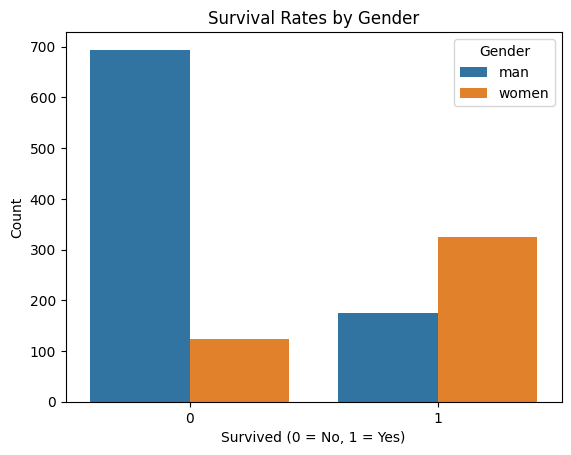

In [15]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for survival rates by gender
sns.countplot(x='survived', hue='gender', data=titanic)
plt.title('Survival Rates by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

### 3.2 Survival Rates by Passenger Class

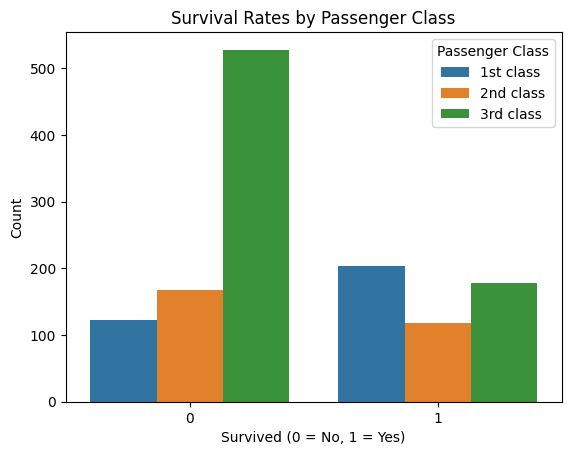

In [16]:
# Bar plot for survival rates by passenger class
sns.countplot(x='survived', hue='pclass', data=titanic)
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Passenger Class')
plt.show()

## Step 4: Save Dataset for Amazon QuickSight

In [18]:
# Save filtered dataset to CSV for Amazon QuickSight
# Save only relevant fields: gender, pclass, survived

# Save to the ch3/datasets/ directory
filtered_path = '../datasets/titanic_filtered.csv'
titanic[['gender', 'pclass', 'survived']].to_csv(filtered_path, index=False)